<a href="https://colab.research.google.com/github/Rush231/zona_riesgo/blob/main/spotify_clasificador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alumno Cordoba Damian

Cargamos los datos y armamos el codigo para preparar los datos

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
# Carga el conjunto de datos (reemplaza 'file_path' con la ruta de tu archivo CSV)
data = pd.read_csv('/content/drive/MyDrive/spotify/Canciones_Spotify.csv')

# Separar características (X) y etiquetas (y)
X = data.drop(['song_title', 'artist', 'target'], axis=1)  # Características
y = data['target']  # Etiquetas


# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos (si es necesario)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dividir datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reviso las columnas del archivo

In [3]:
print(data.columns)

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')


En este momento selecciono  los modelos que pide el trabajo

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
# Puedes elegir otro modelo, por ejemplo:
from sklearn.ensemble import RandomForestClassifier

# Inicialización de modelos
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()  # Modelo adicional
# Entrenar los modelos
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)


GaussianNB()

En esta seccion podemos ver la presicion de cada modelo

In [5]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Evaluación de cada modelo
print("KNN:")
evaluate_model(knn, X_test, y_test)

print("\nSVM:")
evaluate_model(svm, X_test, y_test)

print("\nDecision Tree:")
evaluate_model(decision_tree, X_test, y_test)

print("\nNaive Bayes:")
evaluate_model(naive_bayes, X_test, y_test)

KNN:
Accuracy: 0.8910891089108911
Precision: 0.8632075471698113
Recall: 0.9242424242424242
F1 Score: 0.8926829268292683
Confusion Matrix:
 [[177  29]
 [ 15 183]]

SVM:
Accuracy: 0.5668316831683168
Precision: 0.6419753086419753
Recall: 0.26262626262626265
F1 Score: 0.3727598566308244
Confusion Matrix:
 [[177  29]
 [146  52]]

Decision Tree:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[206   0]
 [  0 198]]

Naive Bayes:
Accuracy: 0.9876237623762376
Precision: 0.9948717948717949
Recall: 0.9797979797979798
F1 Score: 0.9872773536895675
Confusion Matrix:
 [[205   1]
 [  4 194]]


Aca podemos ver las matrices de confusion de forma mas grafica sobre el svm y el knn

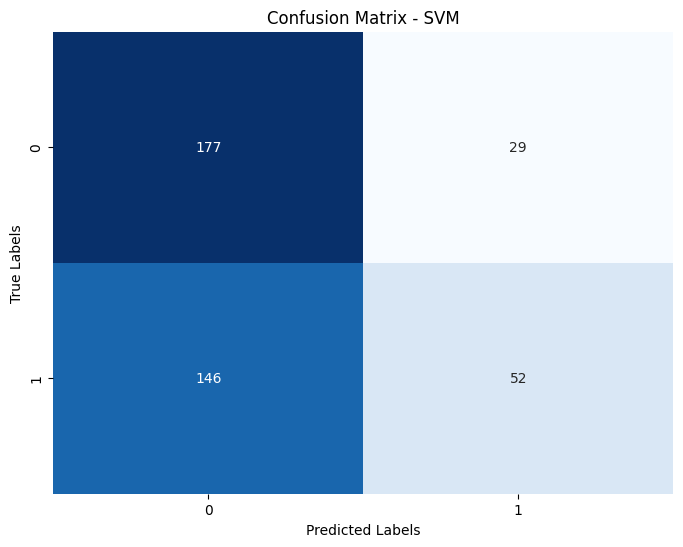

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar predicciones en el conjunto de prueba
y_pred = svm.predict(X_test)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM')
plt.show()

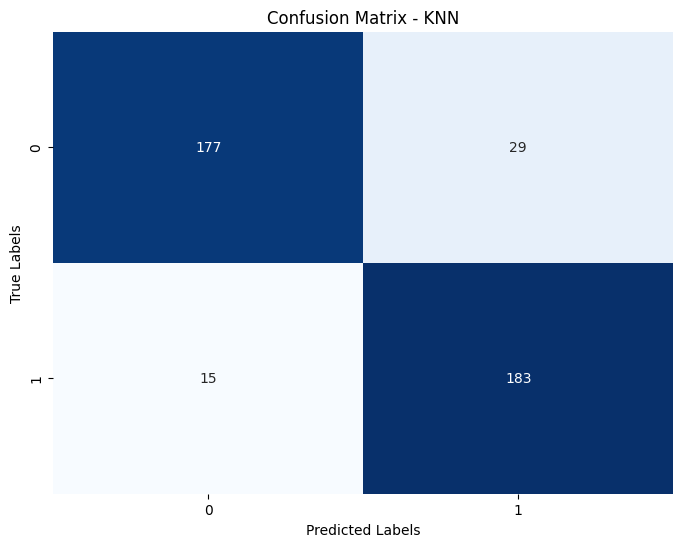

In [7]:

# Realizar predicciones en el conjunto de prueba
y_pred_knn = knn.predict(X_test)

# Generar la matriz de confusión
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Visualizar la matriz de confusión para KNN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - KNN')
plt.show()

In [8]:
# División de datos en entrenamiento y prueba utilizando validación simple
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo (por ejemplo, SVM) usando el conjunto de entrenamiento simple
svm_simple = SVC()
svm_simple.fit(X_train_simple, y_train_simple)

# Evaluar el modelo en el conjunto de prueba simple
evaluate_model(svm_simple, X_test_simple, y_test_simple)

Accuracy: 0.5668316831683168
Precision: 0.6419753086419753
Recall: 0.26262626262626265
F1 Score: 0.3727598566308244
Confusion Matrix:
 [[177  29]
 [146  52]]


En esta zona vamos a ver los hiper parametros donde elijo usar GridSearchCV ya que obtiene datos mas precisos, y busca exhaustivamente todas las combinaciones posibles de los hiperparámetros proporcionados en una cuadrícula predefinida, el problema es que es costoso computacionalmente, puede volverse lento y costoso computacionalmente, especialmente con un gran número de hiperparámetros y valores a explorar

In [13]:
 #Ajuste de hiperparámetros utilizando GridSearchCV
# para KNN
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_
print("Best KNN Parameters:", grid_search_knn.best_params_)

Best KNN Parameters: {'n_neighbors': 3, 'weights': 'distance'}


En este hiper parametro lo dejo como comentario ya que no pude solucionar un problema el cual al ejecutar queda cargando eternamente.


In [10]:
# Definir los parámetros a buscar para SVM
#param_grid_svm = {
 #   'C': [0.1, 1, 10],
  #  'kernel': ['linear', 'rbf', 'poly'],
  #  'gamma': ['scale', 'auto']
#}

# Inicializar el modelo SVM
#svm = SVC()

# Realizar la búsqueda de hiperparámetros con GridSearchCV para SVM
#grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
#grid_search_svm.fit(X_train, y_train)

# Obtener los mejores hiperparámetros para SVM
#best_params_svm = grid_search_svm.best_params_
#print("Best Parameters - SVM:", best_params_svm)

In [11]:
# Definir los parámetros a buscar para Árbol de Decisión
param_grid_tree = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo Árbol de Decisión
decision_tree = DecisionTreeClassifier()

# Realizar la búsqueda de hiperparámetros con GridSearchCV para Árbol de Decisión
grid_search_tree = GridSearchCV(decision_tree, param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)

# Obtener los mejores hiperparámetros para Árbol de Decisión
best_params_tree = grid_search_tree.best_params_
print("Best Parameters - Decision Tree:", best_params_tree)

Best Parameters - Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


En esta seccion se ensambla los modelos

In [12]:
# Ensamblado de modelos utilizando VotingClassifier
voting_classifier = VotingClassifier(estimators=[('knn', best_knn), ('svm', svm), ('decision_tree', decision_tree), ('naive_bayes', naive_bayes)], voting='hard')
voting_classifier.fit(X_train, y_train)

# Evaluación del ensamble
print("\nEnsemble Model:")
evaluate_model(voting_classifier, X_test, y_test)



Ensemble Model:
Accuracy: 0.9653465346534653
Precision: 1.0
Recall: 0.9292929292929293
F1 Score: 0.9633507853403142
Confusion Matrix:
 [[206   0]
 [ 14 184]]


In [14]:
# Ensamblado de modelos utilizando VotingClassifier
voting_classifier = VotingClassifier(estimators=[('knn', best_knn), ('svm', svm), ('decision_tree', decision_tree), ('naive_bayes', naive_bayes)], voting='hard')
voting_classifier.fit(X_train, y_train)

# Evaluación del ensamble
print("\nEnsemble Model:")
evaluate_model(voting_classifier, X_test, y_test)


Ensemble Model:
Accuracy: 0.9653465346534653
Precision: 1.0
Recall: 0.9292929292929293
F1 Score: 0.9633507853403142
Confusion Matrix:
 [[206   0]
 [ 14 184]]


evaluaciones finales del modelo

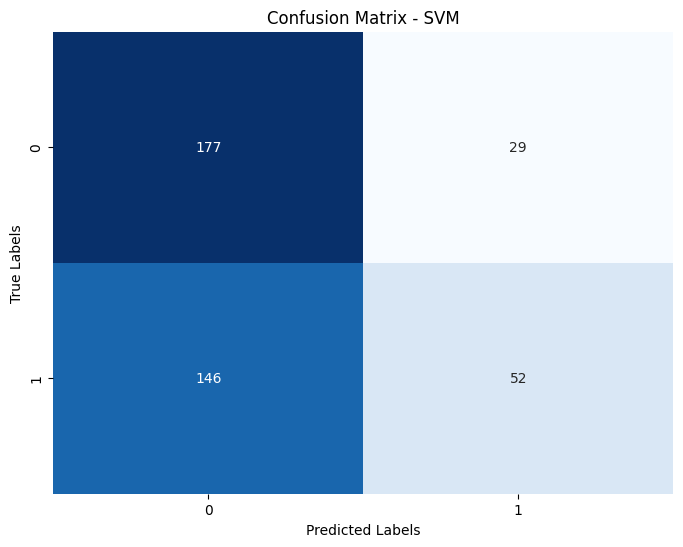

Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.55      0.86      0.67       206
           1       0.64      0.26      0.37       198

    accuracy                           0.57       404
   macro avg       0.59      0.56      0.52       404
weighted avg       0.59      0.57      0.52       404



In [15]:
# Realizar predicciones en el conjunto de prueba
y_pred_svm = svm.predict(X_test)

# Generar la matriz de confusión para SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Visualizar la matriz de confusión para SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM')
plt.show()

# Obtener y mostrar métricas de precisión, recall y F1-score para SVM
print("Classification Report - SVM:")
print(classification_report(y_test, y_pred_svm))

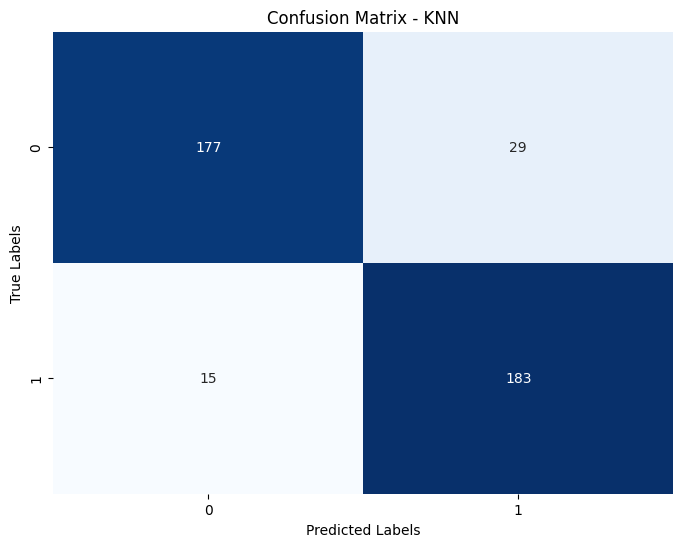

Classification Report - KNN:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       206
           1       0.86      0.92      0.89       198

    accuracy                           0.89       404
   macro avg       0.89      0.89      0.89       404
weighted avg       0.89      0.89      0.89       404



In [16]:
# Realizar predicciones en el conjunto de prueba
y_pred_knn = knn.predict(X_test)

# Generar la matriz de confusión para KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Visualizar la matriz de confusión para KNN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - KNN')
plt.show()

# Obtener y mostrar métricas de precisión, recall y F1-score para KNN
print("Classification Report - KNN:")
print(classification_report(y_test, y_pred_knn))

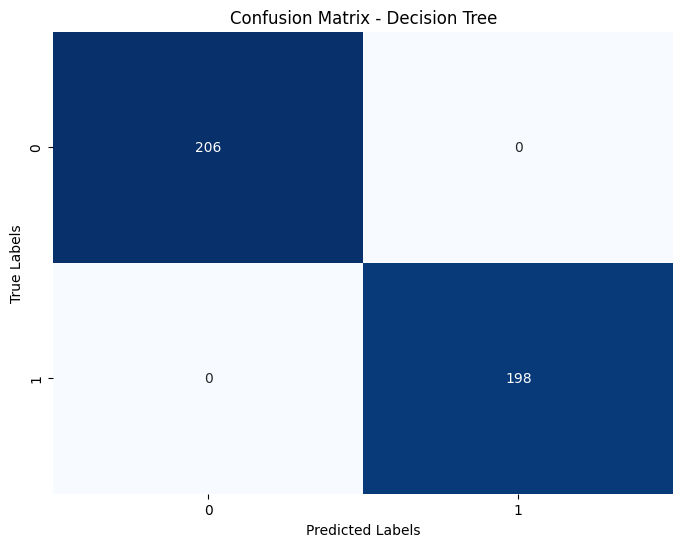

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       198

    accuracy                           1.00       404
   macro avg       1.00      1.00      1.00       404
weighted avg       1.00      1.00      1.00       404



In [21]:
# Inicializar el modelo Árbol de Decisión
decision_tree = DecisionTreeClassifier()

# Entrenar el modelo con los datos de entrenamiento
decision_tree.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_tree = decision_tree.predict(X_test)

# Generar la matriz de confusión para Árbol de Decisión
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Visualizar la matriz de confusión para Árbol de Decisión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Obtener y mostrar métricas de precisión, recall y F1-score para Árbol de Decisión
print("Classification Report - Decision Tree:")
print(classification_report(y_test, y_pred_tree))

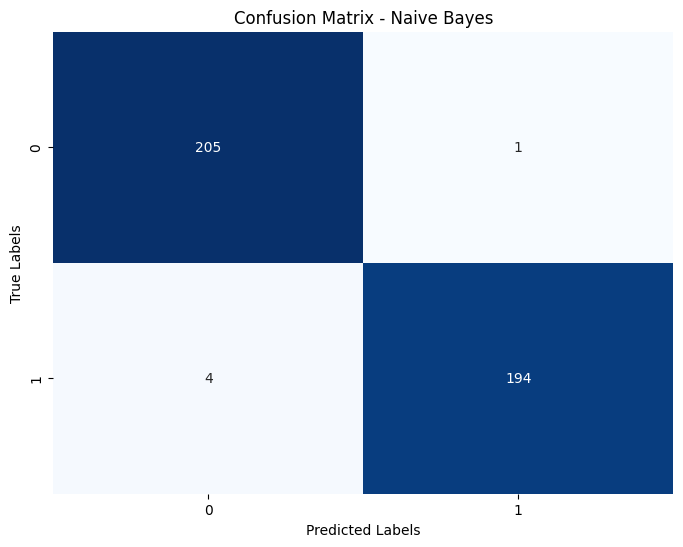

Classification Report - Naive Bayes:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       206
           1       0.99      0.98      0.99       198

    accuracy                           0.99       404
   macro avg       0.99      0.99      0.99       404
weighted avg       0.99      0.99      0.99       404



In [20]:
# Realizar predicciones en el conjunto de prueba
y_pred_bayes = naive_bayes.predict(X_test)

# Generar la matriz de confusión para Naive Bayes
conf_matrix_bayes = confusion_matrix(y_test, y_pred_bayes)

# Visualizar la matriz de confusión para Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bayes, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# Obtener y mostrar métricas de precisión, recall y F1-score para Naive Bayes
print("Classification Report - Naive Bayes:")
print(classification_report(y_test, y_pred_bayes))